<a href="https://colab.research.google.com/github/arham202/AvSaad/blob/main/Project2(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '25px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1><b>Dataset Sources:</b></h1>
  <ul>
    <li><a>https://www.kaggle.com/datasets/parulpandey/emotion-dataset</a>
    <li><a>https://github.com/Jcharis/end2end-nlp-project</li></a>
    <li><a>https://github.com/lukasgarbas/nlp-text-emotion</a>
  </ul>

 <h1><b>Describing data</b></h1>
 <ul>
  <li> Examining the data and document its surface properties like data format, number of records, or field identities.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/emotion-dataset.csv")

In [3]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [7]:
from google.colab import data_table
data_table.DataTable(df)

In [57]:
from IPython.display import HTML
HTML(f'<p style="font-size:20px">Shape of the Dataset: {df.shape}</p>' +
     f'<p style="font-size:20px">Rows: {df.shape[0]}</p>' +
     f'<p style="font-size:20px">Columns: {df.shape[1]}</p>')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
#Datatype of each column
df.dtypes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Emotion    object
Text       object
dtype: object

In [52]:
#Column name
df.columns.tolist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['Emotion', 'Text']

In [117]:
#Checking for null values
df.isnull().sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Emotion       0
Text          0
Sentiment     0
Clean_Text    0
dtype: int64

In [54]:
df['Emotion'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

joy         16407
sadness     11388
fear         7347
anger        6456
surprise     4634
neutral      2254
love         1304
disgust       856
shame         146
Name: Emotion, dtype: int64

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

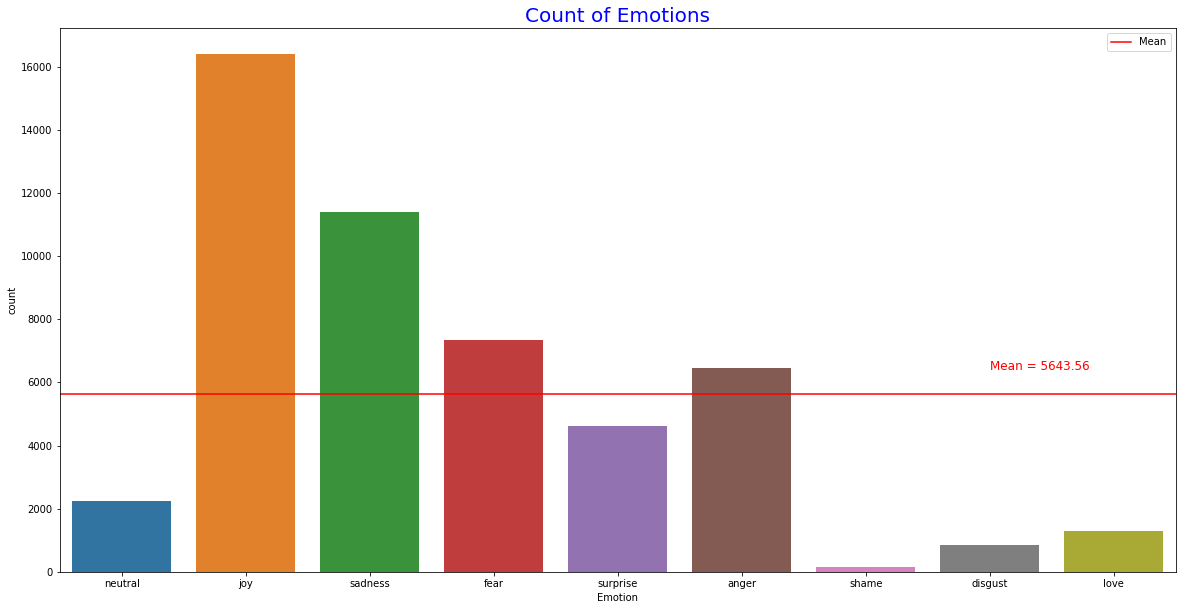

In [100]:
mean = df['Emotion'].value_counts().mean()
plt.figure(figsize = (20,10))
sns.countplot(x='Emotion',data = df)
plt.axhline(y = df['Emotion'].value_counts().mean() , color='r', linestyle='-',label='Mean');
plt.legend()
plt.title('Count of Emotions', fontdict={'fontsize': 20, 'color': 'blue'}, loc='center')
plt.text(x=7, y= (mean + 750), s=f'Mean = {mean:.2f}', color='red', fontsize=12)
plt.show()

<h2><b>Findings from above analysis</b></h2>
<ul>
  <li>Data is Imbalance.
  <li>Rows: 50792 , Columns: 2 
  <li>There is no NULL value
  <li>Mean count = 5643.56
  <li>Joy has the maximum rows datapoints.
  <li>We can remove shame,digust and love since the count is very low.


<h1><b>DATA PREPROCESSING</b></h1>

In [68]:
from textblob import TextBlob

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
#Testing function
get_sentiment("I like machine learning")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Neutral'

In [71]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Emotion                                               Text Sentiment
0  neutral                                             Why ?    Neutral
1      joy    Sage Act upgrade on my to do list for tommorow.   Neutral
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative
3      joy   Such an eye ! The true hazel eye-and so brill...  Positive
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral

In [73]:
df.groupby(['Emotion','Sentiment']).size()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Emotion   Sentiment
anger     Negative     2834
          Neutral      1931
          Positive     1691
disgust   Negative      324
          Neutral       251
          Positive      281
fear      Negative     2405
          Neutral      2296
          Positive     2646
joy       Negative     2271
          Neutral      4425
          Positive     9711
love      Negative      244
          Neutral       179
          Positive      881
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     4834
          Neutral      3293
          Positive     3261
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      856
          Neutral      1606
          Positive     2172
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

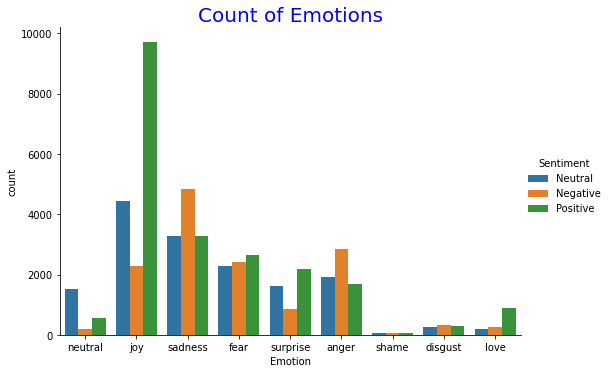

In [98]:
sns.catplot(x = 'Emotion',hue = 'Sentiment',data = df,kind = 'count',aspect = 1.5)
plt.title('Count of Emotions', fontdict={'fontsize': 20, 'color': 'blue'}, loc='center')
plt.show()

<h1><b>DATA CLEANING</b><h1>

In [90]:
!pip install neattext
import neattext.functions as nfx

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 2.7 MB/s eta 0:00:00


In [92]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
data_table.DataTable(df[['Text','Clean_Text']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
from collections import Counter

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
def extract_keywords(text,num = 50):
  tokens = [ tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
emotion_list = df['Emotion'].unique().tolist()
emotion_list

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['neutral',
 'joy',
 'sadness',
 'fear',
 'surprise',
 'anger',
 'shame',
 'disgust',
 'love']

In [105]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
joy_docs = ' '.join(joy_list)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
joy_docs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Sage Act upgrade list tommorow eye true hazel eyeand brilliant Regular features open countenance complexion Oh bloom health pretty height size firm upright figure health merely bloom air head glance hears child picture health gives idea complete picture grownup health loveliness   ugh babe hugggzzz u babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrench GoodLet fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing selected study university Yeah ’ ages passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome   brings Ive bought Christmas presents didnt trawl loads shops :) shit pants Pure 100% gravy life Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter reason celeb

In [108]:
keyword_joy = extract_keywords(joy_docs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
keyword_joy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'feel': 4155,
 'feeling': 1698,
 'like': 1482,
 'im': 924,
 'time': 892,
 'day': 887,
 'amp': 709,
 'work': 626,
 'today': 586,
 'love': 584,
 'Im': 555,
 'good': 541,
 'happy': 516,
 'going': 483,
 'tomorrow': 478,
 'Christmas': 453,
 'got': 433,
 'life': 432,
 'know': 417,
 'people': 404,
 'night': 375,
 'home': 372,
 'dont': 352,
 'think': 346,
 'morning': 341,
 'school': 340,
 ':)': 311,
 'year': 307,
 'want': 301,
 'days': 291,
 'little': 291,
 'joy': 287,
 'week': 287,
 'hours': 280,
 'way': 269,
 'right': 262,
 '2': 262,
 'things': 261,
 'new': 257,
 'long': 254,
 'family': 247,
 'cant': 238,
 'felt': 237,
 'need': 237,
 'great': 236,
 'excited': 231,
 'tonight': 227,
 'pretty': 224,
 'sleep': 215,
 'friends': 209}

In [110]:
def plot_most_common_words(mydict):
  x = mydict.items()
  df_01 = pd.DataFrame(x,columns=["token","count"])
  plt.figure(figsize = (20,10))
  sns.barplot(x='token',y='count',data = df_01)
  plt.xticks(rotation=45)
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

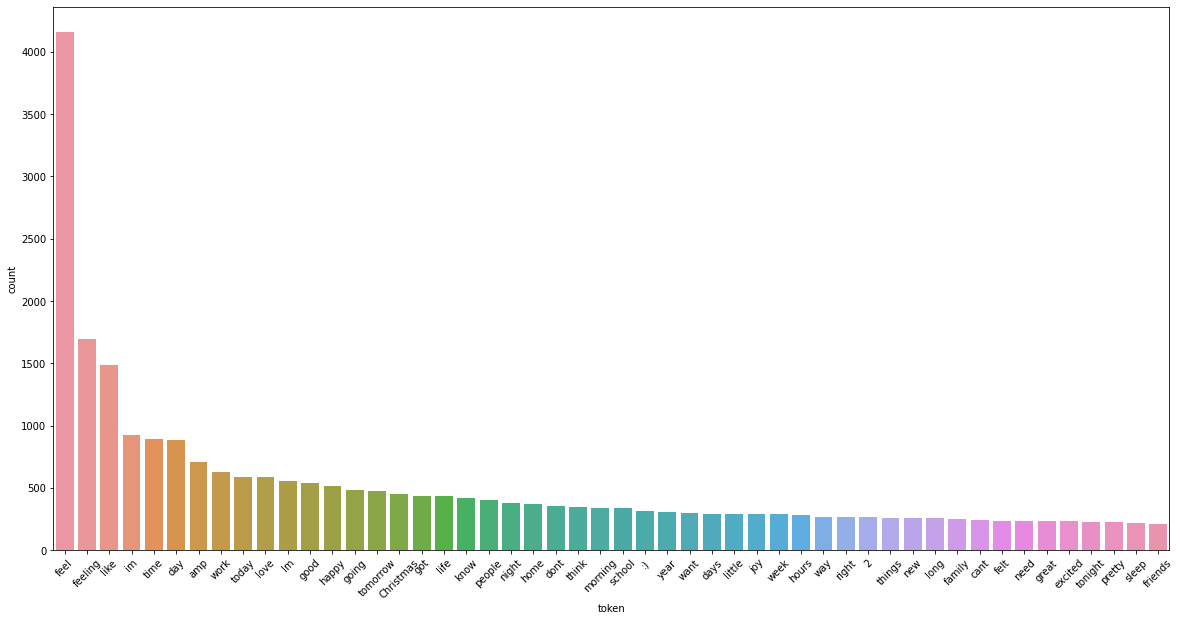

In [111]:
plot_most_common_words(keyword_joy)

<h1><b>Modeling</b></h1>

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6909043181519885

In [115]:
def rec(input):
  pre = pipe_lr.predict([input])
  print(f'Result:',pre[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
string = input()
pre = pipe_lr.predict([string])
print(f'Result:',pre[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

i having a bad day
Result: sadness
